# Predictive Customer Segmentation for Online Shop

**Project Objective:**

The study aims to develop a predictive model designed to anticipate the probability of a reduction in purchasing activity. Utilizing the model forecasts in conjunction with profitability data, the objective is to identify specific customer segments. This segmentation will facilitate the customization of shopping offers based on individual preferences. To achieve this goal, the following steps will be undertaken:
- Pre-processing of Data
- Exploratory Analysis
- Data Preparation for Machine Learning
- Model Selection and Training Algorithm
- Training, Setting, Testing, and Checking Model Quality
- Forecast and Findings
- Segmentation of Customers Based on Modeling Forecast
- Conclusion and Recommendations


**Data Source:**

The dataset is organized into four distinct files, each capturing different aspects of the business:
1. Customer Behavior on Site: This file contains data on customer interactions and behaviors while navigating the site.
2. Revenue Data: Provides information on the revenue generated over a specific period.
3. Time Spent on Site: Data related to the amount of time customers spend on the site during their visits.
4. Average Monthly Sales Profit: Presents insights into the average monthly sales profit.


**Tools and libraries:**
- Python
- Pandas
- Matplotlib
- Numpy
- Sklearn
- Seaborn
- Math
- Phik

# Прогнозная модель для сегментации клиентов интернет-маркета

**Аннотация проекта** 

На данных интернет-магазина проводится исследовательский анализ с последующей разработкой решения на основе бизнес-моделирования, которое позволит персонализировать предложения постоянным клиентам для увеличения покупательской активности.


**Цель исследования** — разработать модель, которая предскажет вероятность снижения покупательской активности. Используя результаты прогнозов модели и данные о прибыльности, выделить сегменты клиентов для возможности персонализировать покупательские предложения. Для этого будут выполнены следующие шаги:
- Предварительная обработка данных.
- Исследовательский анализ.
- Подготовка данных для машинного обучения.
- Выбор модели и алгоритма её обучения.
- Обучение, настройка, тестирование и проверка качества моделей. 
- Прогноз и выводы.
- Сегментация покупателей с учётом результатов моделирования.
- Общий вывод и предложения. 


**Описание данных**

Датасет представлен в четырёх разных файлах:
1. Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
2. Данные о выручке, которую получает магазин с покупателя.
3. Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
4. Данные о среднемесячной прибыли от продаж каждому покупателю за последние 3 месяца.


**Инструменты и библиотеки:**
- Python
- Pandas
- Matplotlib
- Numpy
- Sklearn
- Seaborn
- Math
- Phik

In [1]:
! pip install phik -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install shap -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade scikit-learn -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# импорт библиотек, модулей и функций
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import re
import warnings

# функция для расчёта матрицы корреляции
from phik import phik_matrix

# функция для разделения датасета на выборки
from sklearn.model_selection import train_test_split

# инструменты для пайплайн
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# классы для преобразования данных
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# классы для моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# инструменты для автоподбора гиперпараметров
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# инструменты для расчёта метрик
from sklearn.metrics import (
    roc_auc_score, 
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)

In [5]:
# установим настройки для отображения всех столбцов датафрейма
pd.set_option('display.max_columns', None)

### Шаг 1. Загрузка данных

1. Загрузим файлы и проверим, что данные в таблицах соответствуют описанию.
2. Данные представлены в четырёх файлах. Создадим функции, чтобы нивелировать повторяющиеся действия при выводе основной информации и проверке данных на дубликаты и пустые значения.

In [6]:
# определим функцию data_info() для вывода основной информации
def data_info(data):
    data.info()
    display(data.head())

In [7]:
# определим функцию data_isnull_isdup() для проверки на дубликаты и пустые значения
def data_isnull_isdup(data):
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:')
    print(data.isnull().sum())

In [8]:
# считываем данные из csv-файлов и сохраняем в соответствующие датафреймы
# укажем в аргументах разделители колонок и цифр
df_market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', decimal = ',')
df_market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', decimal = ',')
df_market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', sep=',')
df_money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal = ',')

**1. Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении**

In [9]:
# вызовем функцию data_info()
data_info(df_market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


- В таблице 13 столбцов, из них 7 имеют числовой тип данных и 6 представлены строковым или сочетанным типом. 
- Числовые значения в столбцах — `Маркет_актив_6_мес` и `Акционные_покупки` имеют тип object. Вероятно, в столбцах есть сочетания типов данных.
- Названия колонок не соответствуют единому стилю.
- Очевидны неявные дубликаты в названии типа сервиса.
- Количество значений в столбцах не различается.

**2. Данные о выручке, которую получает магазин с покупателя**

In [10]:
# вызовем функцию data_info()
data_info(df_market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


- В таблице три столбца два из которых имеют тип object: название `периода` и сумма `выручки` — числовой столбец, который, вероятно, содержит комбинацию различных типов данных.
- Названия колонок не соответствуют принятому стилю.
- Количество значений в столбцах не различается.

**3. Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода**

In [11]:
# вызовем функцию data_info()
data_info(df_market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


- В таблице три столбца, из них один содержит название `периода`, во время которого зафиксировано общее время, и два с числовыми значениями — `id` покупателя и `минуты` проведённые на сайте.
- Значения в столбце `Период` имеют явные опечатки в названии.
- Названия колонок не соответствуют принятому стилю.
- Количество значений в столбцах не различается.

**4. Данные о среднемесячной прибыли от продаж каждому покупателю за последние 3 месяца**

In [12]:
# вызовем функцию data_info()
data_info(df_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


- В таблице два столбца с числовыми значениями типа int64 — `id` покупателя и float64 — `прибыль`.
- Названия колонок не соответствуют единому стилю.
- Количество значений в столбцах не различается.

**Вывод:** 

Основываясь на предварительном обзоре датафреймов отметим следующее:
- Объёма данных достаточно для дальнейшего исследования.
- Количество значений в столбцах не различается. Значит, в данных нет очевидных пропущенных значений. 
- Названия столбцов отличаются по стилю и не соответствуют единообразию.
- Значения в некоторых столбцах следует привести к числовому типу для исключения возможных ошибок при анализе.

В этой связи, для дальнейшего анализа необходима предварительная обработка.

###  Шаг 2. Предобработка данных

1. Проверим данные на наличие пропусков и дубликатов. 
2. Рассмотрим корректность типов данных у каждого признака. При необходимости устраним проблемы.

**Датасет — Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении**

In [13]:
# перечень названий столбцов таблицы
df_market_file.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [14]:
# приведём названия столбцов к единому стилю
df_market_file.columns = [re.sub(r'(?<!^)(?=[A-ZА-ЯЁ])', '_', i).lower() for i in df_market_file.columns]
df_market_file.columns

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [15]:
# дообработаем некоторые столбцы
df_market_file = df_market_file.rename(columns={
    'покупательская активность': 'покупательская_активность',
    'тип сервиса': 'тип_сервиса',
    'разрешить сообщать': 'разрешить_сообщать',
})

На предыдущем шаге общей оценки данных было обнаружено, что числовые значения в двух столбцах датафрейма — `маркет_актив_6_мес` и `акционные_покупки` имеют тип object. Вероятно, в столбцах есть сочетания типов данных.
- Столбец `маркет_актив_6_мес` содержит среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Столбец `акционные_покупки` содержит среднемесячную долю покупок по акции от общего числа покупок за последние 6 месяцев.

Преобразование этих столбцов в соответствующие числовые типы данных облегчит выполнение математических операций, агрегирование данных и последующий анализ признаков.

In [16]:
# преобразуем типы данных в столбцах в числовой
df_market_file['маркет_актив_6_мес'] = df_market_file['маркет_актив_6_мес'].astype(float).astype(int)
df_market_file['акционные_покупки'] = df_market_file['акционные_покупки'].astype(float)

In [17]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_market_file)

Количество явных дубликатов: 0
Количество пропусков:
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64


В датафрейме не обнаружено пропущенных значений и явных дубликатов. Рассмотрим неявные дубликаты.

In [18]:
# просмотр уникальных названий типа сервиса
df_market_file['тип_сервиса'].sort_values().unique()

array(['премиум', 'стандарт', 'стандартт'], dtype=object)

In [19]:
# избавимся от неявных дубликатов названий при помощи replace()
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace('стандартт', 'стандарт')

In [20]:
# вывод описательных статистик
df_market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,3.796154,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.041473,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.000000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.000000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.000000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.000000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.000000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Столбцы с преобразованными типами значений теперь отображаются в описательных статистиках датафрейма. Описание признаков выглядит корректно и пока не вызывает подозрений.

**Датасет — Данные о выручке, которую получает магазин с покупателя**

In [21]:
# перечень названий столбцов таблицы
df_market_money.columns

Index(['id', 'Период', 'Выручка'], dtype='object')

In [22]:
# приведём названия столбцов к единому стилю
df_market_money.rename(columns=lambda x: x.lower(), inplace=True)
df_market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

На предыдущем шаге общей оценки данных было обнаружено, что числовые значения в столбце `выручка` имеет тип object. При этом столбец содержит значения суммы выручки за период.

In [23]:
# преобразуем тип данных в столбце в числовой
df_market_money['выручка'] = df_market_money['выручка'].astype(float)

In [24]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_market_money)

Количество явных дубликатов: 0
Количество пропусков:
id         0
период     0
выручка    0
dtype: int64


In [25]:
# просмотр уникальных названий периода, во время которого зафиксирована выручка
df_market_money['период'].sort_values().unique()

array(['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц'],
      dtype=object)

Неявных дубликатов также не обнаружено. 

In [26]:
# вывод описательных статистик
df_market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Столбец с преобразованным типом значений теперь отображается и в описательных статистиках. Можно видеть, что максимальная сумма выручки на фоне среднего и медианных значений выглядит аномально высокой.

In [27]:
# вывод строк, в которых значения признака больше или равны 8000
df_market_money[df_market_money['выручка'] >= 8000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


По всей видимости это единственная строка в датафрейме, которая содержит аномально высокие значения признака. Для корректной работы на этапе обучения модели, следовало бы избавиться от этой строки. Но прежде рассмотрим данные о поведении покупателя на сайте по id из первого датафрейма. 

In [28]:
# вывод строки по id из первого датафрейма
df_market_file[df_market_file['id'] == 215380]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


- С одной стороны мы видим, что клиент относится к `типу сервиса` — "премиум", `популярная категория` - "техника для красоты и здоровья", "покупательская активность" данного клиента "снизилась", при этом бизнес-запрос заключается в том, чтобы создать модель, которая позволит удерживать активность постоянных клиентов с помощью персонализированных предложений. То есть, данный клиент попадает в интересы бизнес-запроса. 
- Однако, в признаке `разрешить_сообщать` мы также видим, что клиент запретил присылать дополнительные предложения. 
- Учитывая данную информацию, правильным решением будет избывиться от этой строки с выбивающимся значением, чтобы предупредить некорректное обучение модели.
- Для сохранения равного количества наблюдений во всех таблицах, удалим строку с выбивающимся значением во всех четырёх датасетах.

In [29]:
# удаление строки с id клиента из всех датафреймов для сохранения размерности
df_market_file = df_market_file[df_market_file['id'] != 215380]
df_market_money = df_market_money[df_market_money['id'] != 215380]
df_market_time = df_market_time[df_market_time['id'] != 215380]
df_money = df_money[df_money['id'] != 215380]

**Датасет — Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода**

In [30]:
# перечень названий столбцов таблицы
df_market_time.columns

Index(['id', 'Период', 'минут'], dtype='object')

In [31]:
# приведём названия столбцов к единому стилю
df_market_time.rename(columns=lambda x: x.lower(), inplace=True)
df_market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [32]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_market_time)

Количество явных дубликатов: 0
Количество пропусков:
id        0
период    0
минут     0
dtype: int64


In [33]:
# просмотр уникальных названий периода, во время которого зафиксировано общее время
df_market_time['период'].sort_values().unique()

array(['предыдцщий_месяц', 'текущий_месяц'], dtype=object)

In [34]:
# приведем название периода в корректный вид при помощи метода replace()
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [35]:
# вывод описательных статистик
df_market_time.describe()

,id,минут
count,2598.000000,2598.000000
mean,215997.975366,13.336413
std,375.102733,4.081664
min,215348.000000,4.000000
25%,215673.250000,10.000000
50%,215998.000000,13.000000
75%,216322.750000,16.000000
max,216647.000000,23.000000


**Датасет — Данные о среднемесячной прибыли от продаж каждому покупателю за последние 3 месяца**

In [36]:
# перечень названий столбцов таблицы
df_money.columns

Index(['id', 'Прибыль'], dtype='object')

In [37]:
# приведём названия столбцов к единому стилю
df_money.rename(columns=lambda x: x.lower(), inplace=True)
df_money.columns

Index(['id', 'прибыль'], dtype='object')

In [38]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_money)

Количество явных дубликатов: 0
Количество пропусков:
id         0
прибыль    0
dtype: int64


In [39]:
# вывод описательных статистик
df_money.describe()

,id,прибыль
count,1299.000000,1299.000000
mean,215997.975366,3.996721
std,375.174972,1.014107
min,215348.000000,0.860000
25%,215673.500000,3.300000
50%,215998.000000,4.050000
75%,216322.500000,4.670000
max,216647.000000,7.430000


Таблица содержит данные о среднемесячной прибыли покупателя за последние 3 месяца, то есть какую прибыль получает магазин от продаж каждому покупателю.

**Вывод:**

На подготовительном этапе мы изучили основные сведения о четырех датафреймах с последующей предобработкой:
- определили количество и тип данных в таблицах
- привели названия столбцов к единому стилю
- проверили данные на наличие пропусков и дубликатов
- избавились от явных аномалий и неявных дубликатов
- преобразовали столбцы с числовыми данными из типа object в соответствующие числовые типы
- убедились, что все данные отображаются корректно

В таком виде данные готовы к более подробному исследовательскому анализу.

### Шаг 3. Исследовательский анализ данных

1. Проведём исследовательский анализ данных по каждому датасету. 
2. Отберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

**Проведём анализ категориальных признаков таблицы с данными о поведении покупателя на сайте**

In [40]:
# выведем число уникальных значений в каждом из категориальных столбцов
cat_col_market_file = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
df_market_file[cat_col_market_file].nunique()

покупательская_активность    2
тип_сервиса                  2
разрешить_сообщать           2
популярная_категория         6
dtype: int64

В данных четыре категориальных признака, которые содержат от двух до шести категорий.

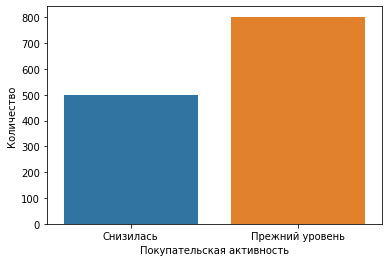

In [41]:
# построим гистограмму, чтобы визуализировать значения целевого признака
sns.countplot(x='покупательская_активность', data=df_market_file)
plt.xlabel('Покупательская активность')
plt.ylabel('Количество')
plt.show()

In [42]:
# оценим распределение категорий по столбцу целевого признака
df_market_file['покупательская_активность'].value_counts(normalize=True)

Прежний уровень    0.617398
Снизилась          0.382602
Name: покупательская_активность, dtype: float64

- Столбец содержит значения целевого признака, который представлен бинарной категорией — покупательская активность «снизилась» или имеет «прежний уровень».
- Вместе с тем, целевой категориальный признак несбалансирован. 
- Проблему дисбаланса классов следует учесть при подготовке данных для обучения моделей.

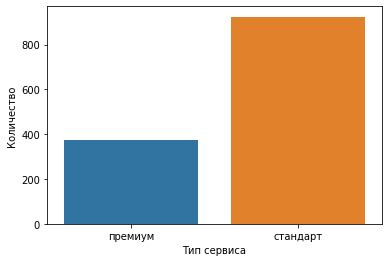

In [43]:
# рассмотрим тип сервиса
sns.countplot(x='тип_сервиса', data=df_market_file)
plt.xlabel('Тип сервиса')
plt.ylabel('Количество')
plt.show()

Большинство клиентов интернет-магазина используют тип сервиса стандарт.

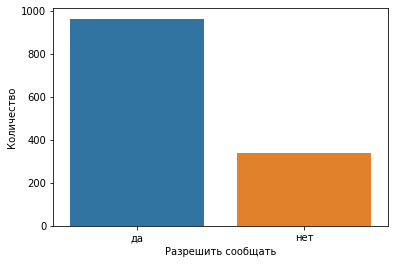

In [44]:
# рассмотрим согласие клиентов на рассылку дополнительных предложений о товаре
sns.countplot(x='разрешить_сообщать', data=df_market_file)
plt.xlabel('Разрешить сообщать')
plt.ylabel('Количество')
plt.show()

- Большинство клиентов согласны на получение рассылок от интернет-магазина с дополнительными предложениями о товаре. Это является положительным моментом, ведь бизнес-запрос заключается в том, чтобы создать модель, которая позволит удерживать активность постоянных клиентов с помощью персонализированных предложений.
- При этом, существенная доля покупателей не согласна получать подобные предложения.

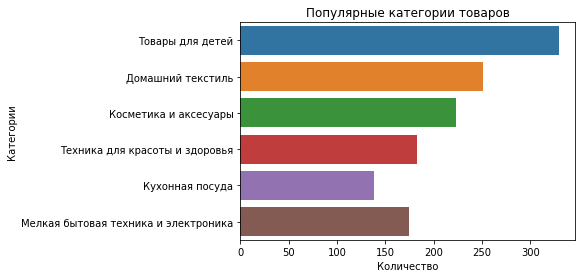

In [45]:
# рассмотрим популярные категории товаров
sns.countplot(y='популярная_категория', data=df_market_file)
plt.xlabel('Количество')
plt.ylabel('Категории')
plt.title('Популярные категории товаров')
plt.show()

Тройку самых популярных категорий товаров у покупателей за последние шесть месяцев представляют *товары для детей*, *домашний текстиль* и *косметика и аксессуары*. Наименее популярна по сравнению с остальными *Кухонная посуда*.

**Рассмотрим количественные признаки таблицы с данными о поведении покупателя на сайте**

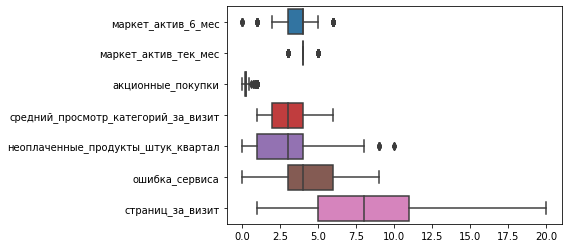

In [46]:
# список количественных признаков таблицы
num_col_market_file = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'
]

# построим диаграмму ящик с усами
sns.boxplot(data=df_market_file[num_col_market_file], orient='h')
plt.yticks(range(len(num_col_market_file)), num_col_market_file)
plt.show()

- На диаграмме представлены семь количественных признаков из восьми имеющихся в датасете. Мы не включили на диаграмму признак `длительность`, так как его значения сильно отличаются по масштабам, что не позволяет рассмотреть остальные признаки.
- В целом диаграмма показывает, что почти все признаки разного масштаба. Это следует учесть при подготовке данных для обучения модели.
- Отдельные точки за пределами «усов» у признаков, связанных с числом маркетинговых коммуникаций и количеством неоплаченных товаров являются выбросами. Это могут быть случаи с необычно высокими или низкими значениями по сравнению с остальной частью набора данных.

Построим гистограмму частотности распределения для каждого признака, чтобы получить наглядное представление о структуре данных.

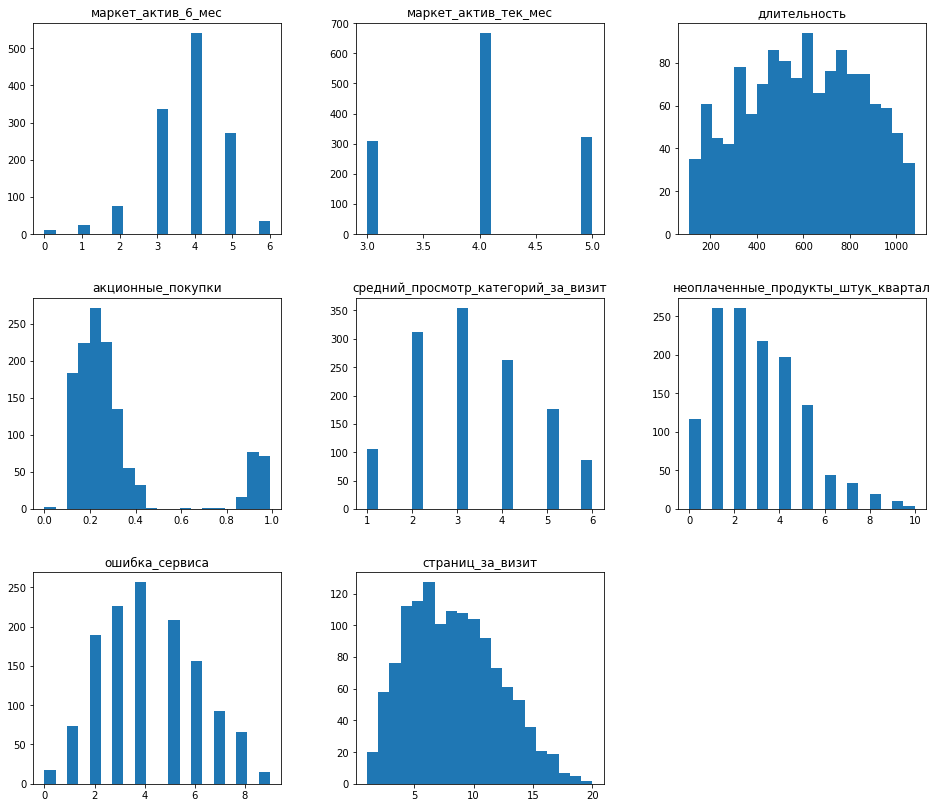

In [47]:
# визуализируем распределение каждого числового признака
# список количественных признаков таблицы
num_col_market_file = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'
]

df_market_file[num_col_market_file].hist(bins=20, figsize=(16, 14), grid=False)
plt.show()

**Вывод:**

- Cреднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев в среднем не отличается от количества маркетинговых коммуникаций в текущем месяце — среднее значение обоих признаков находится в пределах четырёх. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте варьируется от 100 до 1000 и в среднем составляет около 600 дней.
- На гистограмме со значениями среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев заметны два отдельных «пика», которые характеризуют две группы покупателей — те, кто в основном предпочитают акционные товары и те, кто в меньшей степени ориентируется на акции при совершении покупок.
- В течение последнего месяца в среднем покупатель просмотрел за визит 3 категории товаров. Это значение варьируется от 1 до 6.
- Общее число неоплаченных товаров в корзине за последние 3 месяца составляет в среднем 3 предмета, но есть клиенты, которые оставляют неоплаченными и до 10 товаров.
- Число сбоев, которые коснулись покупателя во время посещения сайта варьируется от 1 до 9 и в среднем составляет 4 таких случая. Это в некоторой степени может обуславливать ситуации неоплаченных товаров в корзине покупателей. Вероятно, интернет-магазину наряду с поиском решений на основе бизнес-моделирования следует стабилизировать работу своего сервиса.
- Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца в большинстве случаев составляет около 8, а в некоторых — это значение намного выше.

**Проведём анализ признаков таблицы с данными о выручке, которую получает магазин с покупателя**

In [48]:
# рассмотрим значения по столбцу
df_market_money['период'].value_counts()

текущий_месяц          1299
препредыдущий_месяц    1299
предыдущий_месяц       1299
Name: период, dtype: int64

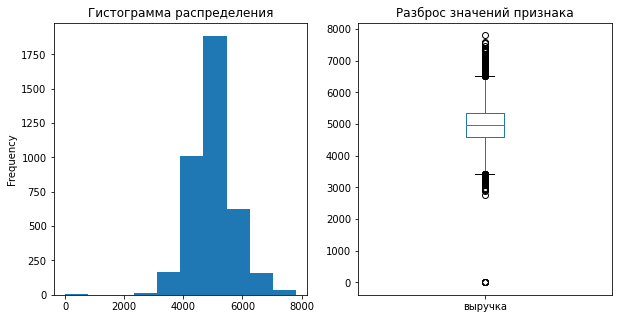

In [49]:
# рассмотрим значения по признаку 'выручка'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_market_money['выручка'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_market_money['выручка'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

**Вывод:**

- Гистограмма показыавет, что в среднем сумма выручки, которую получает магазин с покупателя составляет около 4000, а в некоторых случаях это значение намного выше.
- Форма ящика позволяет говорить, что большинство значений представлены примерно одинаковой суммой выручки, в среднем около 4000 с покупателя.
- Диапазон суммы, которую покупатель всего потратил за период взаимодействия с сайтом варьируется в пределах от 3500 до 6500. 
- Выбросы указывают, что есть покупатели с необычно высокими и низкими тратами на покупки по сравнению с остальной частью набора данных. Пока не будем их удалять, вместе с тем учтём этот факт при выборе метрик для оценки модели.

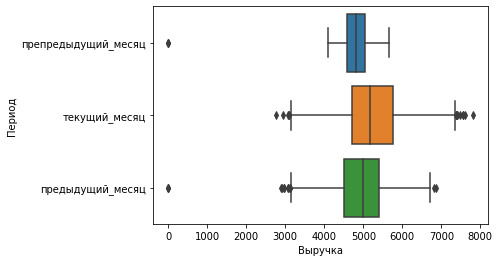

In [50]:
# рассмотрим значения по каждому периоду
sns.boxplot(x='выручка', y='период', data=df_market_money)
plt.xlabel('Выручка')
plt.ylabel('Период')
plt.show()

Согласно графику сумма выручки за текущий месяц увеличилась по сравнению с двумя предыдущими месяцами.

**Проведём анализ признаков таблицы с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода**

In [51]:
# рассмотрим значения по столбцу
df_market_time['период'].value_counts()

текущий_месяц       1299
предыдущий_месяц    1299
Name: период, dtype: int64

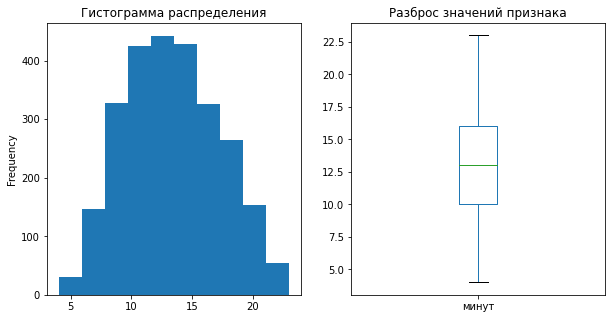

In [52]:
# рассмотрим значения по признаку 'минут'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_market_time['минут'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_market_time['минут'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

**Вывод:**

- Согласно графикам большинство покупателей проводят на сайте интернет-магазина в среднем 13 минут.
- Временной диапазон варьируется в пределах от 10 до 16 минут.
- Выбросов, которые указывали бы на экстремально низкие или высокие значения, не обнаружено.

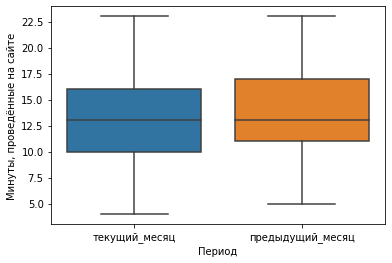

In [53]:
# рассмотрим значения по каждому периоду
sns.boxplot(x='период', y='минут', data=df_market_time)
plt.xlabel('Период')
plt.ylabel('Минуты, проведённые на сайте')
plt.show()

Согласно графикам за текущий месяц покупатель провёл на сайте интернет-магазина чуть меньше времени по сравнению с предыдущим месяцем.

**Проведём анализ признаков таблицы с данными о среднемесячной прибыли от продаж каждому покупателю за последние 3 месяца**

In [54]:
# вывод описательных статистик
df_money.describe()

,id,прибыль
count,1299.000000,1299.000000
mean,215997.975366,3.996721
std,375.174972,1.014107
min,215348.000000,0.860000
25%,215673.500000,3.300000
50%,215998.000000,4.050000
75%,216322.500000,4.670000
max,216647.000000,7.430000


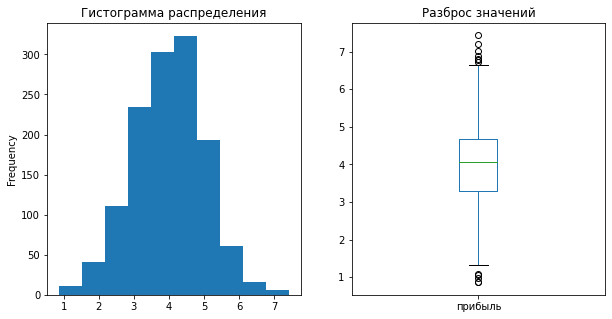

In [55]:
# рассмотрим значения по стоблцу прибыль
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_money['прибыль'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_money['прибыль'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений')
plt.show()

**Вывод:**

- Гистограмма распределения среднемесячной прибыли покупателя за последние 3 месяца имеет колоколообразный вид.
- Медианное значение прибыли, которую получает магазин от продаж каждому покупателю находится на показателе 4.
- При этом есть покупатели, которые принесли необычно высокую и низкую прибыль по сравнению с остальной частью набора данных.

**Отберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период, используя данные о выручке.**

In [56]:
# фильтруем датафрейм с соответствующими условиями
df_buy_activity = pd.pivot_table(df_market_money, index='id', columns='период', values='выручка')
df_buy_activity = df_buy_activity[(df_buy_activity['предыдущий_месяц'] > 0.0) & 
                                  (df_buy_activity['препредыдущий_месяц'] > 0.0) & 
                                  (df_buy_activity['текущий_месяц'] > 0.0)]
df_buy_activity.describe()

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,1296.000000,1296.000000,1296.000000
mean,4947.468750,4836.202160,5238.096065
std,700.797239,333.514091,834.318717
min,2890.000000,4098.000000,2758.700000
25%,4498.125000,4584.500000,4706.050000
50%,5005.500000,4810.500000,5179.950000
75%,5405.625000,5056.000000,5759.275000
max,6869.500000,5663.000000,7799.400000


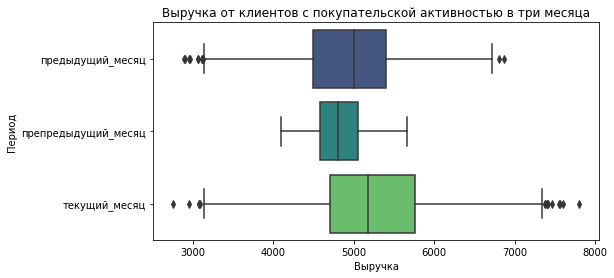

In [57]:
# список количественных признаков таблицы
revenue_col = ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

# построим диаграмму
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_buy_activity[revenue_col], palette='viridis', orient='h')
plt.yticks(range(len(revenue_col)), revenue_col)
plt.title('Выручка от клиентов с покупательской активностью в три месяца')
plt.xlabel('Выручка')
plt.ylabel('Период')
plt.show()

**Вывод по данным клиентов с покупательской активностью не менее трёх месяцев:**
- Диаграмма и описательные статистики показывают, что в текущем месяце значение минимальной выручки меньше такового значения в предыдущих периодах. Наряду с этим, значение максимальной выручки больше такового значения по сравнению с предыдущими месяцами.
- На это указывает и более широкий диапазон выручки в текущем месяце, который варьируется в пределах от 3000 до 7500. 
- Вместе с тем, есть клиенты, которые принесли необычно высокую и низкую выручку по сравнению с остальной частью набора данных.

### Шаг 4. Объединение датафреймов

1. Объединим датафреймы `market_file.csv`, `market_money.csv`, `market_time.csv`.
2. Так как данные о выручке и времени на сайте находятся в одном столбце для всех периодов, перед объединением обработаем таблицы *market_money* и *market_time*, чтобы в итоговой таблице получить отдельные столбцы для каждого периода.
3. В рамках бизнес-задачи нам интересны только те клиенты, у которых была активность каждый месяц на протяжении всех трёх месяцев. Учтём эти условия условия.

In [58]:
# создадим сводную таблицу для данных о выручке
df_piv_money = df_market_money.pivot(index='id', columns='период', values='выручка')
# переименуем столбцы
df_piv_money = df_piv_money.rename(
    columns={
        'предыдущий_месяц': 'выручка_предыдущий_месяц',
        'препредыдущий_месяц': 'выручка_препредыдущий_месяц',
        'текущий_месяц': 'выручка_текущий_месяц'
    }
)

# проверим столбцы на наличие нулевых значений
df_piv_money[df_piv_money['выручка_предыдущий_месяц'] == 0]

период,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215357,0.0,0.0,5986.3
215359,0.0,0.0,4735.0


In [59]:
# избавимся от строк с нулевыми значениями
df_piv_money = df_piv_money[df_piv_money['выручка_предыдущий_месяц'] != 0]

In [60]:
# создадим сводную таблицу для данных о времени на сайте
df_piv_time = df_market_time.pivot(index='id', columns='период', values='минут')
# переименуем столбцы
df_piv_time = df_piv_time.rename(
    columns={
        'предыдущий_месяц': 'время_предыдущий_месяц',
        'текущий_месяц': 'время_текущий_месяц'
    }
)

In [61]:
# объединим датафреймы
df_market_merge = pd.merge(df_market_file, df_piv_money, on='id', how='inner')
df_market_merge = pd.merge(df_market_merge, df_piv_time, on='id', how='inner')

# выведем размерность
print("До объединения:", df_market_file.shape)
print("После объединения:", df_market_merge.shape)

До объединения: (1299, 13)
После объединения: (1296, 18)


In [62]:
# для обучения модели столбец id не нужен, поэтому сделаем эти значения индексами с помощью set_index()
df_market_pipe = df_market_merge.set_index('id')

### Шаг 5. Корреляционный анализ

1. Проведём корреляционный анализ признаков в количественной шкале в итоговом датасете. 
2. Оценим признаки на предмет мультиколлинеарности и при необходимости устраним её.

На предыдущем этапе было обнаружено, что не все признаки распределены нормально, поэтому для изучения взаимосвязи будем использовать корреляцию Phik, который устойчив к выбросам и ненормальному распределению.

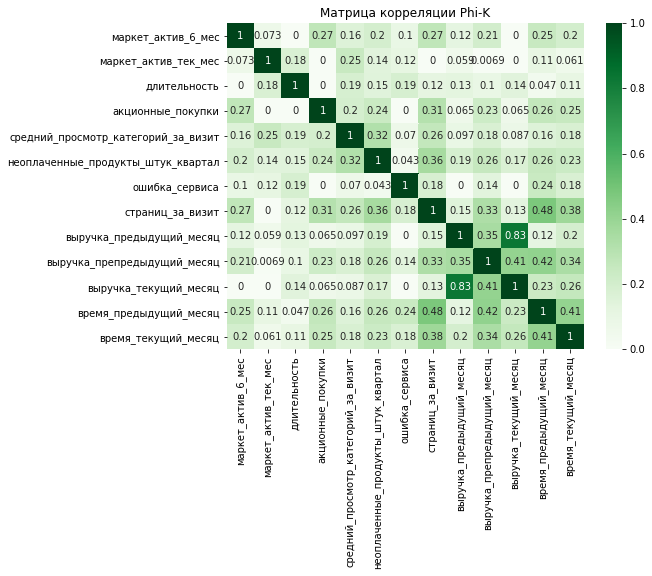

In [63]:
# выберем столбцы с количественными признаками, исключив id
interval_cols = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'время_предыдущий_месяц',
    'время_текущий_месяц'
]

# укажем количественные признаки
df_phik_market = df_market_pipe[interval_cols]

# рассчитаем матрицу корреляции Phi-K
phik_overview = df_phik_market.phik_matrix(interval_cols=interval_cols)

# построим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(phik_overview, annot=True, cmap='Greens', vmin=0, vmax=1)
plt.title('Матрица корреляции Phi-K')
plt.show()

**Вывод:**
- Матрица корреляции показывает, что в итоговом датасете не обнаружено пар признаков в количественной шкале, которые сильно коррелируют друг с другом.
- Мультиколлинеарность относится к ситуации, когда две или более независимые переменные сильно коррелируют, что затрудняет различение индивидуального воздействия входного признака на тагрет. В нашем случае такой тесной связи между парами количественных признаков не наблюдается.

### Шаг 6. Использование пайплайнов

**1. Подготовим данные для обучения.**

Перечислим особенности данных:
- Целевой признак — `покупательская_активность`: «снизилась» или «прежний уровень». Закодируем строковые классы числами с помощью кодировщика `LabelEncoder` — так вычисления будут выполнятся быстрее.
- В данных есть дисбаланс классов, нужно обязательно выполнить `стратификацию по целевому признаку`. 
- Катагориальные признаки: `разрешить_сообщать` и `популярная_категория` — нужно кодировать с помощью `OneHotEncoder`.
- Категориальный признак: `тип_сервиса` — нужно кодировать с помощью `OrdinalEncoder`, так как это категориальный порядковый тип. У такого признака есть логичная связь между категориями, в частности, уровень сервиса — «премиум» и «стандарт».
- Количественные признаки нужно масштабировать.
- Метод масштабирования сделаем гиперпараметром, то есть зададим возможность перебора методов `StandardScaler` и `MinMaxScaler`.

**2. Обучим четыре модели:**
- KNeighborsClassifier()
- DecisionTreeClassifier()
- LogisticRegression()
- SVC()

Для каждой модели подберём гиперпараметры. Для оценки качества используем метрику `ROC-AUC`, так как она подходит для бинарной классификации с несбалансированной выборкой как в нашем случае.

**3. Определим лучшую модель.**

In [64]:
# объявляем константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()
df_market_pipe['покупательская_активность'] = label_encoder.fit_transform(df_market_pipe['покупательская_активность'])

# делим данные на входные и целевые
X_train, X_test, y_train, y_test = train_test_split(
    df_market_pipe.drop(['покупательская_активность'], axis=1),
    df_market_pipe['покупательская_активность'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = df_market_pipe['покупательская_активность'])

# списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
              'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
              'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
              'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
              'время_предыдущий_месяц', 'время_текущий_месяц']

# пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
])

# пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[['стандарт', 'премиум']],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan
    )),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', MinMaxScaler(), num_columns)
], remainder='passthrough')

# итоговый пайплайн: подготовка данных и модель
# опускаем предупреждения
warnings.filterwarnings('ignore')

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10, 100, 1000],
        'models__kernel': ['linear'],
        'models__degree': [1, 2, 3, 4, 5, 6], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    verbose=3, # видеть состояние процесса
    n_jobs=-1
)
# обучаем модель
randomized_search.fit(X_train, y_train)

# выводим лучшие параметры и метрику
print('Параметры лучшей модели:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Параметры лучшей модели:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_o

In [65]:
# оценим работу модели на тестовой выборке и рассчитаем прогноз
y_test_prob = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_prob)}')

Метрика ROC-AUC на тестовой выборке: 0.9208024916070056


**Вывод:**
- Лучше всего справилась модель `SVC()` с гиперпараметрами `C=100`, `degree=2`, `kernel='linear'` и масштабированием `StandardScaler()`. Метод опорных векторов обладает свойством робастности, то есть устойчивости к выбросам, что актуально в нашем случае.
- Значение метрики лучшей модели на тренировочной выборке *(0.8977)* указывает на хорошую способность модели различать положительные и отрицательные случаи.
- Модель показывает довольно высокие прогнозные свойства на тестовых данных. Оценка вероятности для положительного класса составляет *0.9208*. 

### Шаг 7. Анализ важности признаков

1. Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.
2. Сделаем выводы о значимости признаков.

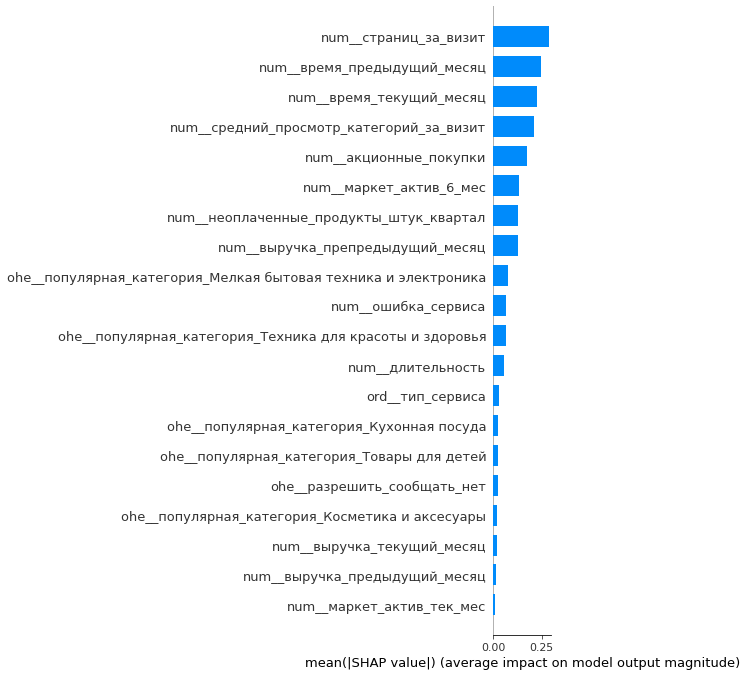

In [66]:
# извлечение лучшей модели и повторное обучение на тренировочных данных
final_model = randomized_search.best_estimator_.named_steps['models']
# обработка train данных для лучшей модели
X_train_shap = randomized_search.best_estimator_.named_steps['preprocessor'].fit_transform(X_train)
# обработка test данных для лучшей модели
X_test_shap = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test)
# получение названий признаков после обработки
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
# вычисление SHAP значений на тестовых данных
explainer = shap.Explainer(final_model, X_train_shap)
shap_values = explainer(X_test_shap)
# визуализация SHAP значений
shap.summary_plot(shap_values, X_test_shap, plot_type="bar", feature_names=feature_names)

**Вывод:**
- Признаки на графике расположены в порядке убывания их вклада. В числе признаков лидеров: популярная категория товаров, среднее количество просмотров страниц за визит на сайт, среднемесячная доля покупок по акции и время проведённое на сайте.
- Модель позволила наметить различие между двумя группами клиентов: покупательская активность «снизилась» или имеет «прежний уровень». Указанные признаки влияют на решения модели, а значит, и клиенты с высокими значениями этих признаков ведут себя по-разному.
- Разработка персонализированных предложений с учётом популярных категорий товаров может быть оправданной мерой для увеличения покупательской активности и удержания постоянных клиентов.

### Шаг 8. Сегментация покупателей

1. Выделим сегмент покупателей с учётом результатов моделирования и данных о прибыльности.
2. Сформулируем основные выводы.

In [67]:
# создадим датафрейм с метками класса и предсказанной вероятностью
df_predicts = pd.DataFrame({
    'класс': y_test,
    'предсказанная_вероятность': y_test_prob
})

# объединим прогнозы модели с данными о прибыльности и продуктовом поведении клиентов
df_res = df_predicts.merge(df_money, on='id', how='inner')
df_res = df_res.merge(df_market_merge, on='id', how='inner')
df_res.head()

,id,класс,предсказанная_вероятность,прибыль,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,216161,0,0.009450,4.69,Прежний уровень,стандарт,да,4,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17
1,215654,1,0.988319,2.75,Снизилась,премиум,нет,1,4,684,0.94,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9
2,216307,0,0.092873,3.16,Прежний уровень,премиум,да,3,4,488,0.13,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11
3,215501,1,0.791221,3.74,Снизилась,премиум,да,3,3,1057,0.35,Домашний текстиль,4,3,5,6,6604.0,4993.0,6758.7,9,9
4,215934,1,0.505034,4.40,Снизилась,стандарт,нет,5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,5090.0,4451.0,5773.8,15,18


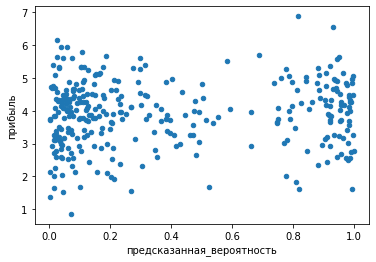

In [68]:
# рассмотрим прибыль и вероятность её снижения на графике
df_res.plot(x='предсказанная_вероятность', y='прибыль', kind='scatter')
None

- Согласно прогнозам модели покупательская активность снизится с высокой вероятностью для существенной доли клиентов почти на всех уровнях среднемесячной прибыли от покупателей.
- На графике более плотно представлена высокая вероятность снижения покупательской активности на уровне от 4 до 5 значений среднемесячных показателей прибыли. То есть, это клиенты, которые с высокой вероятностью снизят покупательскую активность, но при этом приносят довольно высокую прибыль. Рассмотрим покупательское поведение характеризующее данный сектор.

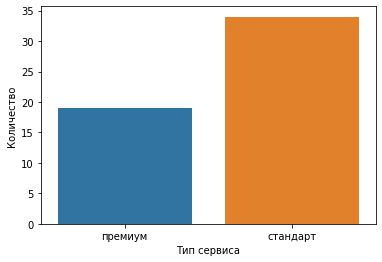

In [69]:
# отбор клиентов с высокой вероятностью снижения покупательской активности и высокой прибыльностью
df_res_group = df_res[(df_res['прибыль'] > 4) & (df_res['предсказанная_вероятность'] > 0.7)]

# рассмотрим сектор по типу сервиса
sns.countplot(x='тип_сервиса', data=df_res_group)
plt.xlabel('Тип сервиса')
plt.ylabel('Количество')
plt.show()

Большинство клиентов с высокой вероятностью снижения покупательской активности и высокой прибыльностью используют тип сервиса стандарт.

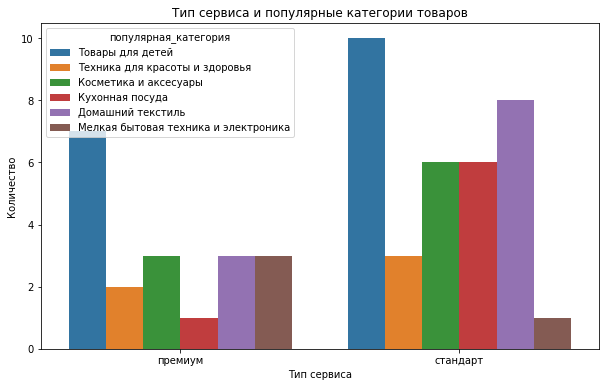

In [70]:
# рассмотрим популярные категории товаров в зависимости от типа сервиса
plt.figure(figsize=(10, 6))
sns.countplot(x='тип_сервиса', hue='популярная_категория', data=df_res_group)
plt.xlabel('Тип сервиса')
plt.ylabel('Количество')
plt.title('Тип сервиса и популярные категории товаров')
plt.show()

- В целом, все категории товаров представлены и в классе сервиса "премиум" и в классе "стандарт".
- В обоих типах сервиса наиболее популярной категорией товаров является "товары для детей". 
- В отличие от "премиум" клиентов, у "стандарт" покупателей товары из категории "мелкая бытовая техника и электроника" являются наименее популярными. Вероятно, для "премиум" клиентов интернет-магазин предоставляет более заманчивые условия в данной категории товаров. При этом, "кухонная посуда" наименее привлекательна для "премиум" покупателей в отличие от "стандарт".
- Интернет-магазину стоит обратить внимание на разницу в представленности низко популярных категорий товаров у "премиум" и "стандарт" клиентов, и изучить причины такого рода низкой популярности. Возможно, стоит расширить ассортимент в категории "кухонная посуда", сделав его более привлекательным для "премиум" покупателей. В то же время, предложить привлекательные для "стандарт" клиентов условия, чтобы привлечь их внимание к товарам категории "мелкая бытовая техника и электроника".

Рассмотрим выручку по категориям товаров за весь период в сегменте прибыльных клиентов.

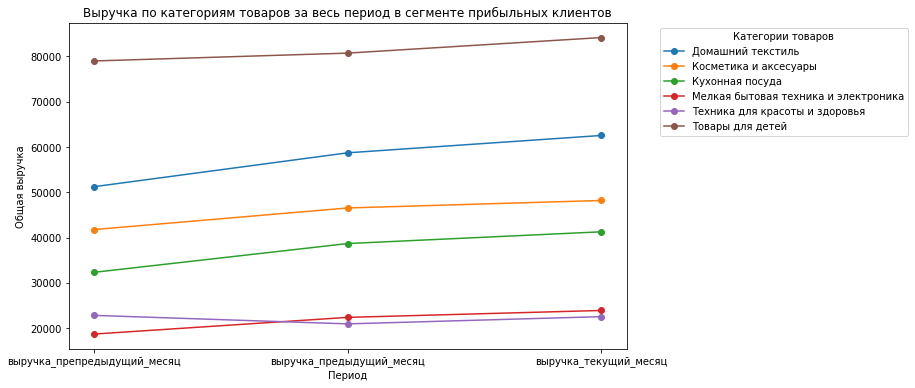

In [71]:
# сгруппируем данные
r = df_res_group.groupby('популярная_категория')[
    ['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
].sum()

# построим график
plt.figure(figsize=(10, 6))
for category in r.index:
    plt.plot(r.columns, r.loc[category], label=category, marker='o')

plt.xlabel('Период')
plt.ylabel('Общая выручка')
plt.title('Выручка по категориям товаров за весь период в сегменте прибыльных клиентов')
plt.legend(title='Категории товаров', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Согласно графику, наибольшую сумму выручки за весь период в сегменте прибыльных клиентов принесли товары для детей.
- Меньше всего за период взаимодействия с сайтом прибыльный покупатель потратил на технику для красоты и здоровья и мелкую бытовую технику.

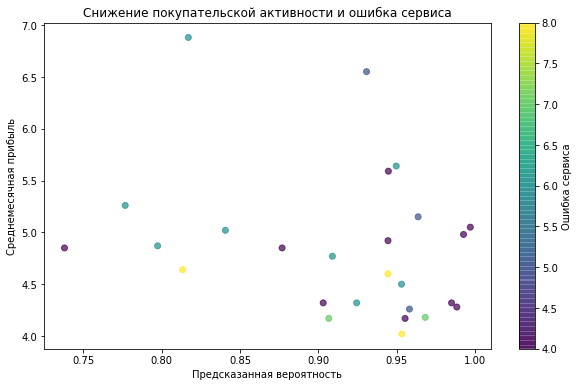

In [72]:
# рассмотрим снижение покупательской активности прибыльных клиентов в зависимости от частоты сервисной ошибки
s = df_res_group[df_res_group['ошибка_сервиса'] > 3]

# построим график
plt.figure(figsize=(10, 6))
plt.scatter(
    s['предсказанная_вероятность'],
    s['прибыль'],
    c=s['ошибка_сервиса'],
    cmap='viridis',
    marker='o',
    alpha=0.7,
)

cbar = plt.colorbar()
cbar.set_label('Ошибка сервиса')
plt.xlabel('Предсказанная вероятность')
plt.ylabel('Среднемесячная прибыль')
plt.title('Снижение покупательской активности и ошибка сервиса')
plt.show()

**Вывод:**
- График показывает, что сегмент прибыльных клиентов довольно часто сталкивается со сбоями в работе сервисов во время посещения сайта, что может выступать негативным фактором обуславливающим снижение покупательской активности в секторе прибыльных клиентов интернет-магазина.
- На этапе анализа данных было установлено, что число сбоев, которые в общем коснулись покупателей во время посещения сайта варьируется от 1 до 9 и в среднем составляет 4 таких случая. Вероятно, интернет-магазину наряду с поиском решений на основе бизнес-моделирования следует стабилизировать работу своего сервиса.

Рассмотрим сектор на предмет открытости к получению маркетинговых предложений от магазина.

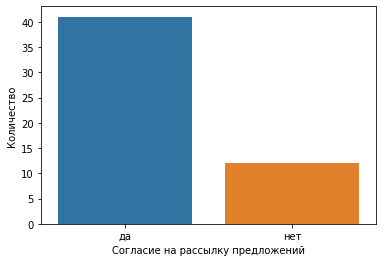

In [73]:
# построим график 
sns.countplot(x='разрешить_сообщать', data=df_res_group)
plt.xlabel('Согласие на рассылку предложений')
plt.ylabel('Количество')
plt.show()

- Большинство клиентов согласны на получение рассылок от интернет-магазина с дополнительными предложениями о товаре. Это является положительным моментом, ведь бизнес-запрос заключается в том, чтобы создать модель, которая позволит удерживать активность постоянных клиентов с помощью персонализированных предложений.

### Шаг 9. Итоговый вывод

На данных интернет-магазина был проведён исследовательский анализ с последующей разработкой решения на основе бизнес-моделирования, которое поможет компании удерживать активность постоянных клиентов с помощью персонализированных предложений.

Учитывая бизнес-задачи заказчика:
1. Обучены и протестированы четыре модели на основе разных алгоритмов. 
2. Для каждой модели были подобраны гиперпараметры.
3. На основе результатов метрик для оценки обобщающих способностей модели, была отобрана лучшая модель для прогноза вероятности снижения покупательской активности клиентов.

Работа включала предварительный этап, исследовательский анализ данных, разработку моделей, оценку важности признаков для лучшей модели, и выделение сегмента клиентов с учётом результатов моделирования.

На **предварительном этапе** мы изучили основные сведения о четырёх датасетах с последующей предобработкой, в частности: определили количество и тип данных в таблицах, привели названия столбцов к единому стилю, проверили данные на наличие дубликатов и пропущенных значений по каждому столбцу, преобразовали тип значений в некоторых столбцах и убедились, что все данные отображаются корректно.

На этапе **исследовательского анализа** был проведён статистический анализ всех признаков, построены графики и оценены особенности распределения количественных признаков.

Этап **разработки модели** включал подготовку данных для её обучения, отбор соответствующих признаков, их масштабирование и кодирование, настройку гиперпараметров, обучение модели, оценку качества с использованием метрик и получение прогнозных значений.

Этап **оценки важности признаков** для лучшей модели предполагал изучение признаков, которые вносят наибольший вклад в корректное предсказание модели.

Этап **сегментации клиентов** включал графическое и аналитическое исследование группы покупателей с использованием результатов моделирования и данных о прибыльности.

**Основные результаты и рекомендации:**
- Лучше всего справилась SVC модель с гиперпараметрами C=100, degree=2, kernel='linear' и масштабированием StandardScaler. Метод опорных векторов обладает свойством робастности, то есть устойчивости к выбросам, что актуально в нашем случае.
- Значение метрики лучшей модели на тренировочной выборке (0.8977) указывает на хорошую способность модели различать положительные и отрицательные классы.
- Модель показывает довольно высокие прогнозные свойства на тестовых данных. Оценка вероятности для положительного класса составляет 0.9208.
- В числе признаков лидеров: `популярная категория` товаров, среднее количество `просмотров страниц` за визит на сайт, среднемесячная доля `покупок по акции` и `время проведённое на сайте`.
- Модель позволила наметить различие между двумя группами клиентов: покупательская активность `снизилась` или имеет `прежний уровень`. Указанные признаки влияют на решения модели, а значит, и клиенты с высокими значениями этих признаков ведут себя по-разному.
- Согласно прогнозу модели, в сегменте **прибыльных клиентов** с высокой вероятностью **снизится покупательская активность**.
- Изучение популярных категорий товаров в данном сегменте клиентов определило различия в плане низко популярных категорий в зависимости от типа сервиса — "премиум" или "стандарт".
- Анализ показал, что сегмент **прибыльных клиентов** довольно часто сталкивается со **сбоями в работе сервисов** во время посещения сайта, что может выступать негативным фактором обуславливающим снижение покупательской активности в секторе прибыльных клиентов интернет-магазина.
- Интернет-магазину стоит обратить внимание на разницу в представленности низко популярных категорий товаров у "премиум" и "стандарт" клиентов, и изучить причины такого рода низкой популярности. Возможно, стоит расширить ассортимент в категории "кухонная посуда", сделав его более привлекательным для "премиум" покупателей. В то же время, предложить привлекательные для "стандарт" клиентов условия, чтобы привлечь их внимание к товарам категории "мелкая бытовая техника и электроника".
- Вместе с тем, компании наряду с поиском решений на основе бизнес-моделирования следует стабилизировать работу сервиса своего интернет-сайта, чтобы нивелировать число сбоев во время посещения страниц с товарами.

В целом, разработка персонализированных предложений с учётом популярных категорий товаров может быть оправданной мерой для увеличения покупательской активности и удержания постоянных клиентов.
